In [263]:
%matplotlib inline

#load dependancies
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
from scipy.io import wavfile
from IPython.display import Audio
from scipy import signal

In [188]:
#Function that will load the data of a WAV file given.
#returns the sampling rate of the song, and the data array itself.

#################  NOTE ##################
#If working with MP3 files, please convert to wav with given conversion file in repository.
#Command for that is "python3 convert.py [songname].mp3 [songname].wav"

def loadData (str):
    rate, data = wavfile.read(str)
    if (len(data.T) > 1):
        data = data.T[0]
    return rate, data

In [189]:
#Function that performs FFT on a randomly sampled portion of data array given.
#Returns the FFT result and the random interval.
def fft (data, intervalSize, rangeofFreq):
    if (len(data) < intervalSize):
        return None;
    start = np.random.randint(0, len(data) - intervalSize + 1)
    chunked = data[start:(start + intervalSize)]
    interv = (start, start + intervalSize)
    return fftpack.fft(chunked, rangeofFreq), interv

In [317]:
### load the data, perform FFT.
freq, data = loadData('input.wav')
sample_rate = 20000

def toRealFreq(f):
    return round(f * (freq / sample_rate))
def toDFTFreq(f):
    return round(f * (sample_rate / freq))
data = np.divide(data, max(data))

print(freq)
print(len(data))
result, randInterval = fft(data, freq // 2, sample_rate)
print(freq // 2)

44100
10785024
22050


211


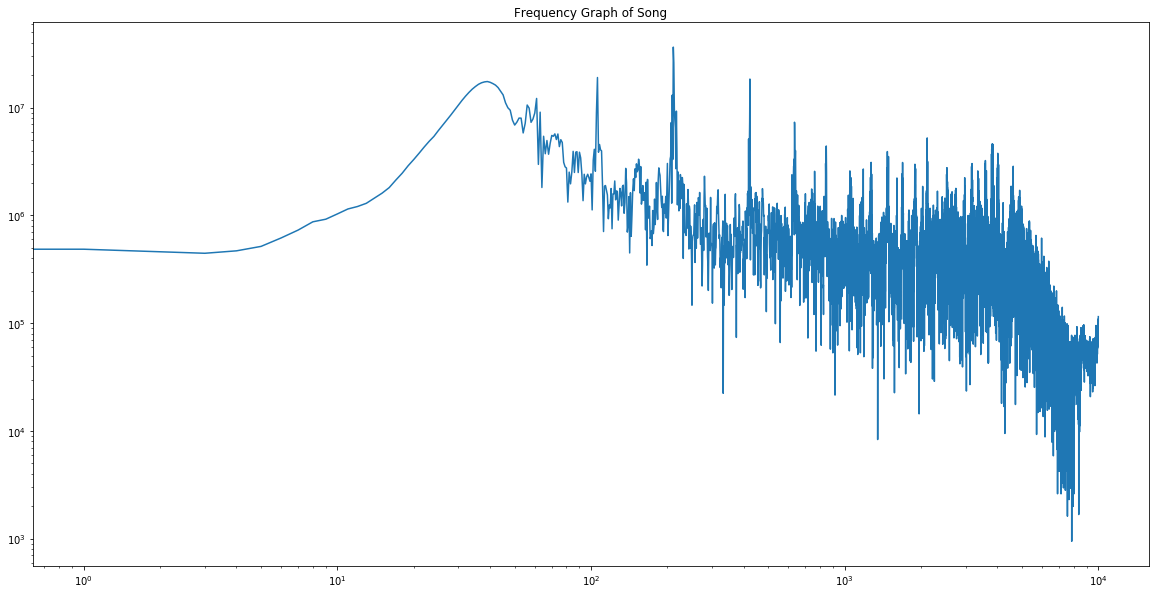

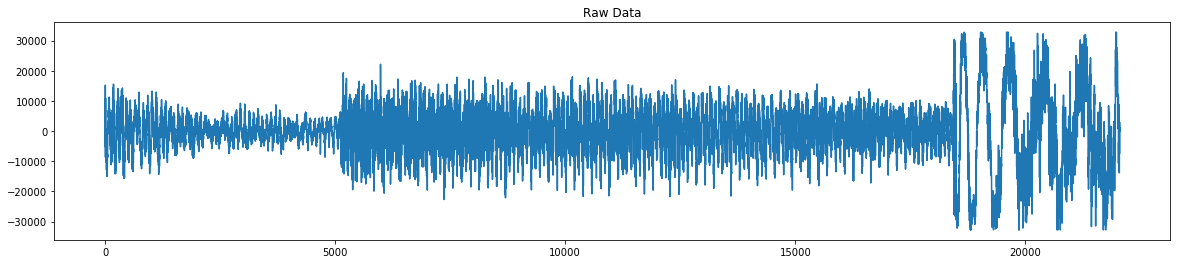

In [306]:
#Take first half because conjugate symmetry. Range of human hearing is 0 to 150000.
magnitudes = [np.absolute(y) for y in result[0:len(result) // 2]]
phase = [np.angle(y) for y in result[0:len(result) // 2]]

print(magnitudes.index(max(magnitudes)))

plt.figure(figsize=(20, 10))
plt.xscale('log');plt.yscale('log');plt.title("Frequency Graph of Song");
plt.plot(magnitudes)
plt.show()

# plt.figure(figsize=(20, 10))
# plt.xscale('log');plt.title("Phase Graph of Song");
# plt.plot(phase)
# plt.show()

plt.figure(figsize=(20, 4))
plt.title("Raw Data")
plt.plot(data[randInterval[0]:randInterval[1]])
plt.show()


60.0


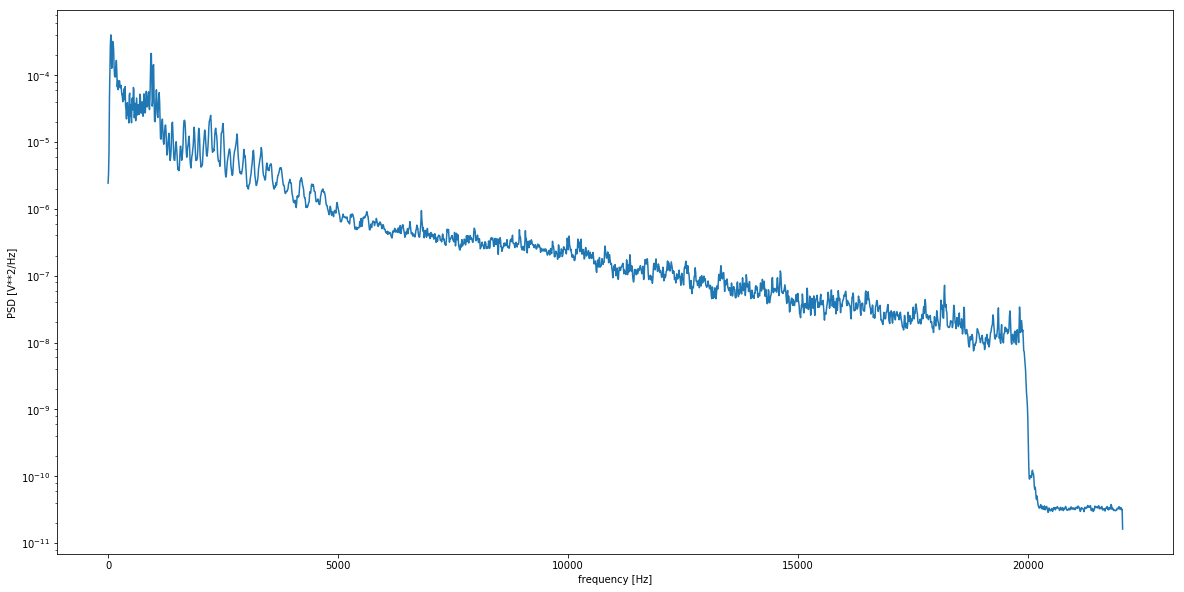

In [318]:
f, Pxx_den = signal.welch(data, freq, nperseg=freq // 10)
print(f[Pxx_den.argmax()])
plt.figure(figsize=(20, 10))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

Subbass:
267675.382594
Bass:
4395012.21158
Mids:
596732.035783
High Mids:
20620.0065264
Highs:
4616.16387214


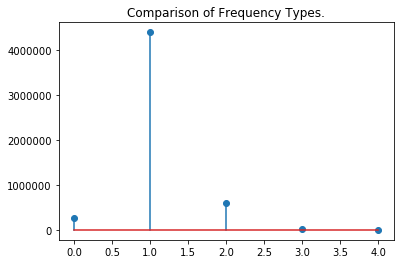

In [205]:
def getSpectrumAvgs(magnitudes):

    subbass = magnitudes[toDFTFreq(0):toDFTFreq(60)]
    bass = magnitudes[toDFTFreq(60):toDFTFreq(300)]
    mids = magnitudes[toDFTFreq(300):toDFTFreq(2000)]
    highmids = magnitudes[toDFTFreq(2000):toDFTFreq(6000)]
    highs = magnitudes[toDFTFreq(6000):toDFTFreq(15000)]

    subbassAvg = max(subbass)
    bassAvg = max(bass)
    midsAvg = max(mids)
    highmidsAvg = max(highmids)
    highsAvg = max(highs)
    return subbassAvg, bassAvg, midsAvg, highmidsAvg, highsAvg

subbassAvg, bassAvg, midsAvg, highmidsAvg, highsAvg = getSpectrumAvgs(magnitudes)
print("Subbass:")
print(subbassAvg)

print("Bass:")
print(bassAvg)

print("Mids:")
print(midsAvg)

print("High Mids:")
print(highmidsAvg)

print("Highs:")
print(highsAvg)

arr = [subbassAvg, bassAvg, midsAvg, highmidsAvg, highsAvg]

plt.stem(arr)
plt.title("Comparison of Frequency Types.")
plt.show()



In [257]:
#Music slice
mslice = freq // 10 #Sample every half second
subbassAvgs = list()
bassAvgs = list()
midsAvgs = list()
highmidsAvgs = list()
highsAvgs = list()
for i in range(0, len(data) // mslice):
    start = i * mslice
    chunk = data[start:min((start + mslice), len(data))]
    fft_result = fftpack.fft(chunk, sample_rate)
    magnitudes = [np.absolute(y) for y in fft_result[0:len(fft_result) // 2]]
    subbass, bass, mids, highmids, highs = getSpectrumAvgs(magnitudes)
    subbassAvgs.append(subbass)
    bassAvgs.append(bass)
    midsAvgs.append(mids)
    highmidsAvgs.append(highmids)
    highsAvgs.append(highs)

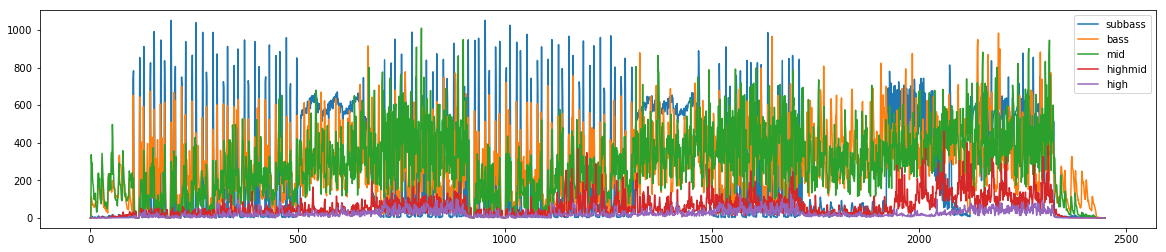

In [258]:
plt.figure(figsize=(20, 4))
plt.plot(subbassAvgs, label="subbass")
plt.plot(bassAvgs, label="bass")
plt.plot(midsAvgs, label="mid")
plt.plot(highmidsAvgs, label="highmid")
plt.plot(highsAvgs, label="high")
plt.legend()
plt.show()

In [308]:
#Here is the randomly sampled portion of the song.
#Feel free to listen.

Audio(data[randInterval[0]:randInterval[1]], rate= freq)

In [17]:
#0 to 60 subbass
#60  to 300 bass
#300 to 2000 midrange
#2000 to 6000 high mids
#6000-15000 high freqs

In [256]:
import copy
#Music slice
#low_data = [1, 3, 5, 8, 2, 2]
low_data = [0] * len(data)
for i in range(1, len(data)):
    low_data[i] = (data[i] + data[i - 1]) / 2
Audio(low_data, rate= freq)
data = low_data

In [235]:
a = [1, 2, 3, 4, 5, 6]
a[2:len(a) - 2] = [0]
print(a)

[1, 2, 0, 5, 6]
